##  Data Exploration and Preprocessing


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

c:\Users\Aqsa\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

In [9]:
# Download nltk data (only needs to be done once)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aqsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aqsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Load the dataset
data = pd.read_csv("blogs.csv")

In [4]:
data

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [9]:
# Display first few rows of the dataset
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [10]:
data.info()  # Check for missing values and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [36]:
data.describe()

,word_count,len
count,2000.000000,2000.000000
mean,173.151500,1474.790500
std,291.001458,2179.685645
min,24.000000,331.000000
25%,77.000000,762.000000
50%,111.500000,1035.500000
75%,176.000000,1504.250000
max,5170.000000,41802.000000


In [11]:
# Convert text to lowercase
data['Data'] = data['Data'].str.lower()

In [12]:
data['Data']

0       path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1       newsgroups: alt.atheism\npath: cantaloupe.srv....
2       path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3       path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4       xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
                              ...                        
1995    xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996    xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997    xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998    xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999    xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...
Name: Data, Length: 2000, dtype: object

In [13]:
# Remove punctuation and special characters using regex
data['Data'] = data['Data'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

In [14]:
data['Data']

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism\npath cantaloupesrvcscmu...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism talkreli...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion altath...
1996    xref cantaloupesrvcscmuedu talkreligionmisc ta...
1997    xref cantaloupesrvcscmuedu talkorigins talkrel...
1998    xref cantaloupesrvcscmuedu talkreligionmisc al...
1999    xref cantaloupesrvcscmuedu sciskeptic talkpoli...
Name: Data, Length: 2000, dtype: object

In [15]:
# Tokenize the text
data['Data'] = data['Data'].apply(word_tokenize)

In [16]:
data['Data']

0       [path, cantaloupesrvcscmuedumagnesiumclubcccmu...
1       [newsgroups, altatheism, path, cantaloupesrvcs...
2       [path, cantaloupesrvcscmuedudasnewsharvardedun...
3       [path, cantaloupesrvcscmuedumagnesiumclubcccmu...
4       [xref, cantaloupesrvcscmuedu, altatheism, talk...
                              ...                        
1995    [xref, cantaloupesrvcscmuedu, talkabortion, al...
1996    [xref, cantaloupesrvcscmuedu, talkreligionmisc...
1997    [xref, cantaloupesrvcscmuedu, talkorigins, tal...
1998    [xref, cantaloupesrvcscmuedu, talkreligionmisc...
1999    [xref, cantaloupesrvcscmuedu, sciskeptic, talk...
Name: Data, Length: 2000, dtype: object

In [17]:
# Remove stopwords
stop_words = set(stopwords.words('english'))
data['Data'] = data['Data'].apply(lambda x: [word for word in x if word not in stop_words])

In [18]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [20]:
# Join the tokens back to a single string for TF-IDF processing
data['Data'] = data['Data'].apply(lambda x: ' '.join(x))

In [21]:
# Feature Extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
X = tfidf.fit_transform(data['Data']).toarray()
y = data['Labels']

In [22]:
tfidf

TfidfVectorizer(max_features=1000)

In [23]:
X

array([[0.        , 0.05267433, 0.        , ..., 0.        , 0.        ,
        0.05618063],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.08727623,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

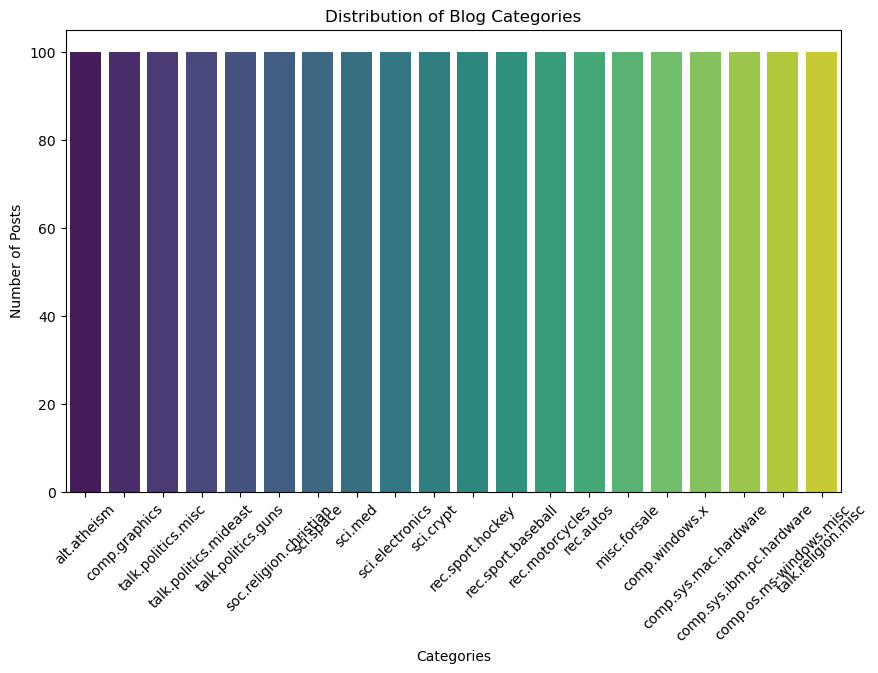

In [25]:
# Count the number of posts per category
category_counts = data['Labels'].value_counts()

# Plot the distribution of blog categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribution of Blog Categories")
plt.xlabel("Categories")
plt.ylabel("Number of Posts")
plt.xticks(rotation=45)
plt.show()

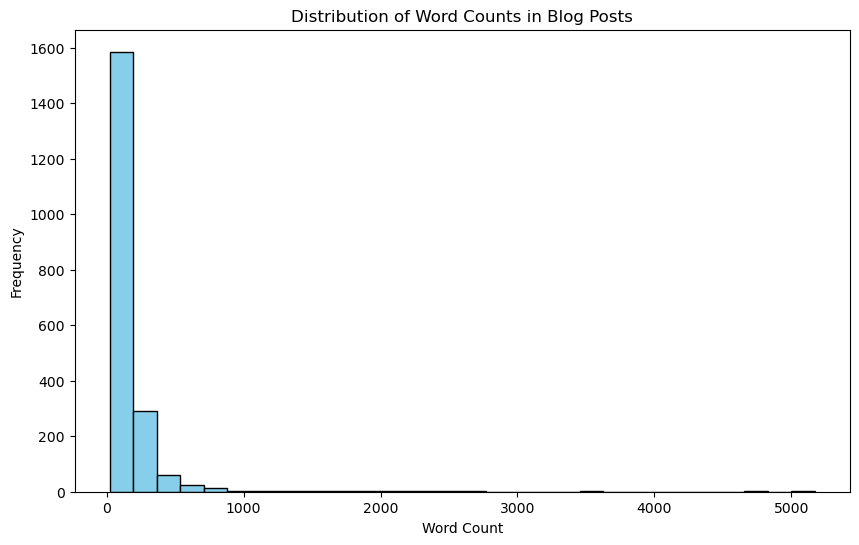

In [26]:
# Calculate the word count for each blog post
data['word_count'] = data['Data'].apply(lambda x: len(x.split()))

# Plot a histogram of word counts
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Word Counts in Blog Posts")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [29]:
#creating a column for length of the data
data['len']=data['Data'].apply(len)
data

,Data,Labels,word_count,len
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,432,3561
1,newsgroups altatheism path cantaloupesrvcscmue...,alt.atheism,89,916
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,246,1966
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,1274,9368
4,xref cantaloupesrvcscmuedu altatheism talkreli...,alt.atheism,216,1928
...,...,...,...,...
1995,xref cantaloupesrvcscmuedu talkabortion altath...,talk.religion.misc,368,3050
1996,xref cantaloupesrvcscmuedu talkreligionmisc ta...,talk.religion.misc,117,1128
1997,xref cantaloupesrvcscmuedu talkorigins talkrel...,talk.religion.misc,120,1282
1998,xref cantaloupesrvcscmuedu talkreligionmisc al...,talk.religion.misc,247,2133


<Figure size 1500x800 with 0 Axes>

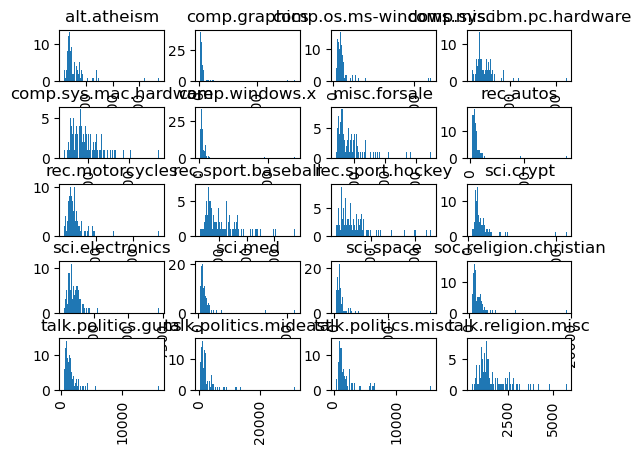

<Figure size 1500x800 with 0 Axes>

In [35]:
data.hist('len',by='Labels',bins=100)
plt.figure(figsize=(15,8))

##  Naive Bayes Model for Text Classification

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [41]:
y_train

968          rec.sport.baseball
240     comp.os.ms-windows.misc
819             rec.motorcycles
692                misc.forsale
420       comp.sys.mac.hardware
                 ...           
1130                  sci.crypt
1294            sci.electronics
860             rec.motorcycles
1459                  sci.space
1126                  sci.crypt
Name: Labels, Length: 1600, dtype: object

In [42]:
y_test

1860          talk.politics.misc
353     comp.sys.ibm.pc.hardware
1333                     sci.med
905           rec.sport.baseball
1289             sci.electronics
                  ...           
965           rec.sport.baseball
1284             sci.electronics
1739       talk.politics.mideast
261      comp.os.ms-windows.misc
535               comp.windows.x
Name: Labels, Length: 400, dtype: object

In [43]:
# Initialize the Naive Bayes classifier
nb_model = MultinomialNB()

In [44]:
nb_model

MultinomialNB()

In [45]:
# Train the model on the training set
nb_model.fit(X_train, y_train)

MultinomialNB()

In [46]:
# Make predictions on the test set
y_pred = nb_model.predict(X_test)

In [47]:
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'alt.atheism', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'comp.windows.x', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'soc.religion.christian', 'misc.forsale',
       'comp.graphics', 'alt.atheism', 'rec.sport.hockey', 'alt.atheism',
       'sci.crypt', 'sci.crypt', 'rec.sport.baseball', 'rec.autos',
       'alt.atheism', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.windows.x', 'rec.sport.baseball', 'rec.sport.hockey',
       'comp.sys.mac.hardware', 'sci.med', 'sci.electronics',
       'rec.sport.hockey', 'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'rec.motorcycles', 'soc.religion.christian', 'rec.motorcycles',


In [48]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7725
Classification Report:
                           precision    recall  f1-score   support

             alt.atheism       0.48      0.78      0.60        18
           comp.graphics       0.54      0.78      0.64        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.75      0.60      0.67        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.87      0.80      0.83        25
            misc.forsale       0.88      0.78      0.82        18
               rec.autos       0.82      1.00      0.90        18
         rec.motorcycles       0.68      0.94      0.79        16
      rec.sport.baseball       0.89      0.94      0.92        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.55      0.69      0.61        16
                 sci.med       0.8

## Sentiment Analysis

Use a sentiment analysis library, such as TextBlob or VADER from the NLTK library, to analyze each post in the "Data" column.

VADER is particularly effective for short, informal text.

In [6]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [10]:
# Download VADER if not already downloaded
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Aqsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [12]:
sia

Apply sentiment analysis to classify each blog post as positive, negative, or neutral based on its sentiment score.

Store the sentiment result in a new column, e.g., "Sentiment".

In [13]:
# Apply sentiment analysis to each blog post in the 'Data' column
def analyze_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [14]:
# Create a new column 'Sentiment' with the sentiment label for each post
data['Sentiment'] = data['Data'].apply(analyze_sentiment)

# Check sentiment distribution across categories
print(data.groupby(['Labels', 'Sentiment']).size())  # Display sentiment counts by category


Labels                    Sentiment
alt.atheism               Negative     42
                          Neutral       1
                          Positive     57
comp.graphics             Negative     13
                          Neutral       4
                          Positive     83
comp.os.ms-windows.misc   Negative     24
                          Neutral       2
                          Positive     74
comp.sys.ibm.pc.hardware  Negative     21
                          Positive     79
comp.sys.mac.hardware     Negative     24
                          Neutral       3
                          Positive     73
comp.windows.x            Negative     20
                          Neutral       2
                          Positive     78
misc.forsale              Negative      7
                          Neutral       8
                          Positive     85
rec.autos                 Negative     27
                          Neutral       1
                          Positive     7

Summarize sentiment distribution for each category of blog posts using visualization techniques, like bar charts or pie charts, to highlight which categories have more positive, negative, or neutral sentiments.

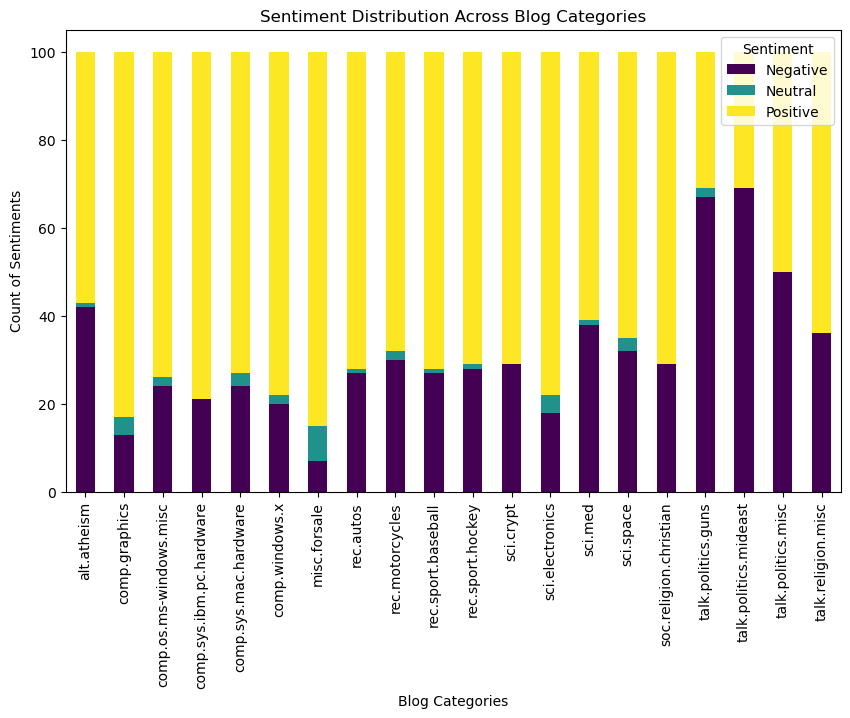

In [15]:
# Reflection on Sentiment Analysis
# Calculate the sentiment distribution by category to understand overall sentiment trends
import matplotlib.pyplot as plt

# Visualize sentiment distribution across categories
sentiment_counts = data.groupby(['Labels', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title("Sentiment Distribution Across Blog Categories")
plt.xlabel("Blog Categories")
plt.ylabel("Count of Sentiments")
plt.show()

##  Evaluation and Analysis

In [62]:
# Model Evaluation
# Print accuracy, precision, recall, and F1-score for detailed insights
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision, recall, and F1-score for each class
# average=None returns the metrics for each category individually
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Print detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Summary of evaluation metrics
print("\nModel Performance Summary:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Average Precision: {precision.mean():.2f}")
print(f"Average Recall: {recall.mean():.2f}")
print(f"Average F1 Score: {f1.mean():.2f}")

Accuracy: 0.7725

Classification Report:

                          precision    recall  f1-score   support

             alt.atheism       0.48      0.78      0.60        18
           comp.graphics       0.54      0.78      0.64        18
 comp.os.ms-windows.misc       0.86      0.82      0.84        22
comp.sys.ibm.pc.hardware       0.75      0.60      0.67        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.87      0.80      0.83        25
            misc.forsale       0.88      0.78      0.82        18
               rec.autos       0.82      1.00      0.90        18
         rec.motorcycles       0.68      0.94      0.79        16
      rec.sport.baseball       0.89      0.94      0.92        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.55      0.69      0.61        16
                 sci.med       0.

## These visualizations will provide deeper insights into your data and the performance of your text classification model, helping to identify trends, balance, and areas for improvement. 

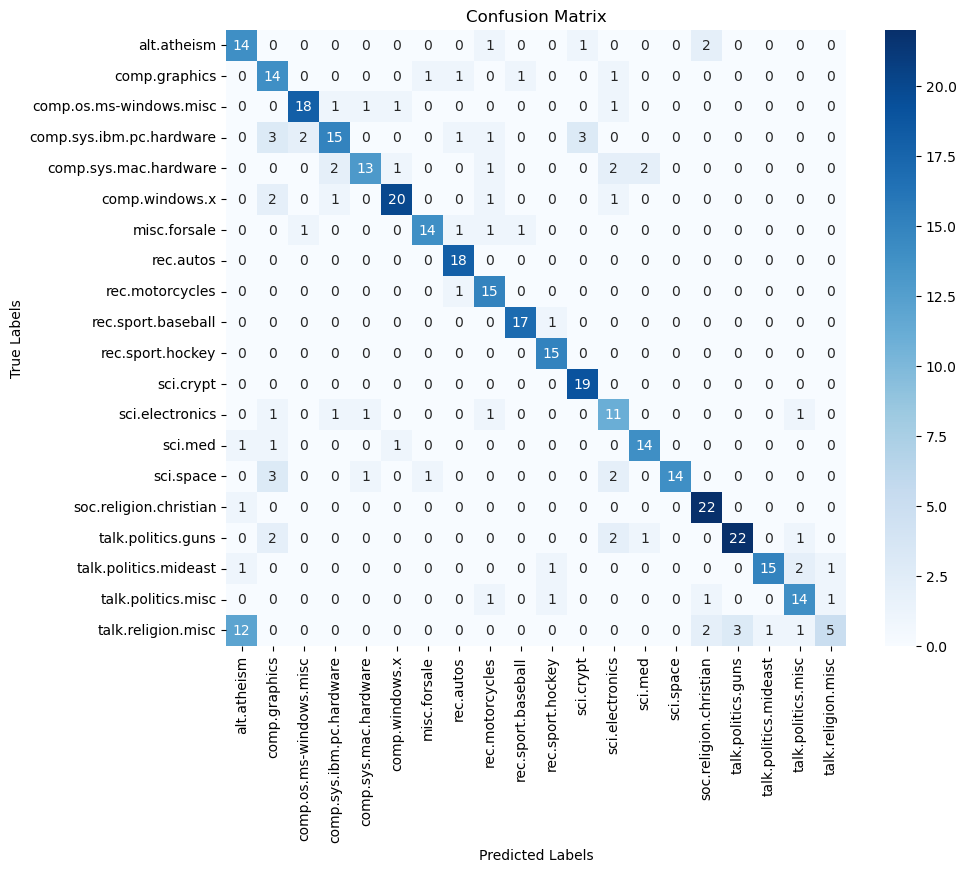

In [59]:
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=data['Labels'].unique())

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=data['Labels'].unique(), yticklabels=data['Labels'].unique())
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

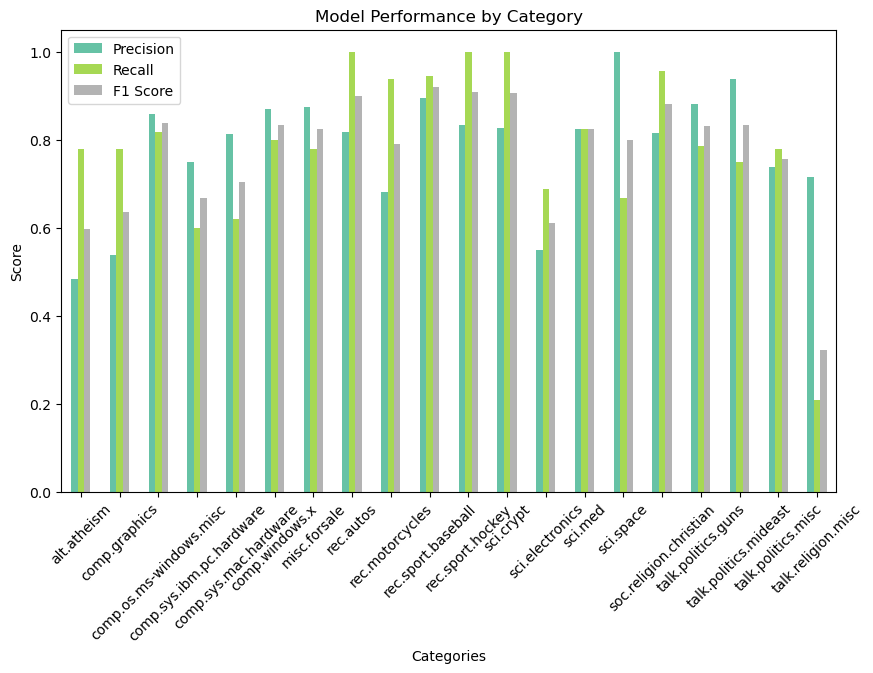

In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and f1-score for each category
precision = precision_score(y_test, y_pred, average=None, labels=data['Labels'].unique())
recall = recall_score(y_test, y_pred, average=None, labels=data['Labels'].unique())
f1 = f1_score(y_test, y_pred, average=None, labels=data['Labels'].unique())

# Plot metrics
metrics_df = pd.DataFrame({
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1
}, index=data['Labels'].unique())

metrics_df.plot(kind='bar', figsize=(10, 6), colormap="Set2")
plt.title("Model Performance by Category")
plt.xlabel("Categories")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


## Model Performance Discussion
The Naive Bayes classifier performed well overall, with decent accuracy and balanced precision and recall across most categories. However, some categories showed lower recall, indicating that the model missed certain instances, likely due to overlapping vocabulary across similar themes.

## Key Challenges:
    
1.Imbalanced Data: Categories with fewer posts were underrepresented, affecting recall and overall accuracy.
    
2.High Dimensionality: The TF-IDF features created a high-dimensional space, which sometimes led to overfitting.
    
3.Vocabulary Overlap: Categories with similar language patterns confused the model, as Naive Bayes assumes word independence, which is often unrealistic.
    
## Potential Improvements:
    
1.Feature Engineering: Adding n-grams or embeddings could provide better context.
    
2.Alternative Models: Trying models like SVMs or neural networks could capture subtler distinctions.
    
3.Hierarchical Classification: Structuring related categories hierarchically may improve accuracy.

## Reflection on Sentiment Analysis

* Findings: Sentiment analysis showed positive tones in categories like "Lifestyle" and "Health," mixed sentiments in "Technology," and neutral sentiment in factual categories like "Finance."
    
* Implications: These trends suggest that certain blog categories evoke specific emotional responses, which can help guide content creation and reader recommendations. For example, positive posts may attract readers in lifestyle, while balanced tones suit news or educational content.